<a href="https://colab.research.google.com/github/darioka/impactdeal-2022/blob/main/notebooks/EPC_01_exploration_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/darioka/impactdeal-2022.git
%cd impactdeal-2022
!pip install -r requirements.txt
!pip install .

Cloning into 'impactdeal-2022'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 132 (delta 11), reused 27 (delta 11), pack-reused 105
Receiving objects: 100% (132/132), 69.73 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/impactdeal-2022
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: missingno
    Found existing installation: missingno 0.5.1
    Uninstalling missingno-0.5.1:
      Successfully uninstalled missingno-0.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/impactdeal-2022
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it 

# Data Exploration - EPC Rating (full)


In this notebook you will explore a dataset with known EPC ratings from three major cities in the UK.
The data has been downloaded, subsampled and pseudonimized from https://epc.opendatacommunities.org/.

Remember that our final goal with this dataset will be to train a machine learning model that predicts the energy rating of a dwelling, based on the other features of this dataset. But for the moment, we just need to understand what information it contains and become confident with it.

## Loading the dataset

The dataset is **known_epc_ratings.csv.gz**. The format is CSV but it's compressed with gzip, as it contains quite a few lines. But no worries, pandas can detect compression and handle it.

In [2]:
import pandas as pd

df = pd.read_csv("data/known_epc_ratings.csv.gz")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## First look at the dataset

Here is where you get to know the dataset. In this section, try to give answers to very simple questions like:

* How many rows/columns?
* What are their data types?
* What are the meaning of the columns?
* Are data types consistent with column descriptions?
* What is the column with the EPC rating? How many classes are there?

In particular, make sure to check the column descriptions ([column_description.tsv](https://github.com/darioka/impactdeal-2022/blob/main/data/column_description.tsv)) and compare them with actual data! This kind of sanity checks are often very useful with real-world datasets.

Also, be flexible! The dataset is big (many columns, many more rows) and it's not very easy to "take a look at it"... why don't you [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) a hundred rows, export them to a standard [csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and read them with your favorite Excel-like tool?

In [3]:
df.shape

(992766, 42)

In [4]:
df["CURRENT_ENERGY_RATING"].value_counts(normalize=True)*100

D    39.464385
C    28.274034
E    18.245689
B     8.929295
F     3.765338
G     1.205621
A     0.115637
Name: CURRENT_ENERGY_RATING, dtype: float64

Finally, let's create lists with the name of the columns, divided by their type. It will be useful later, when we will do different kinds of analyses depending on data types.

For you convenience, lists have already been created and the next cell will import them. Notice that, besides numerical and categorical columns, we make two more groups:

* **ids**: uniquely identify a single sample or a small set of them. No useful information can be inferred from them.

* **dates**: cannot be treated naively as numbers nor as categories.

In [5]:
from impactdeal.config.column_names import TARGET, IDS, DATES, NUMERICAL, CATEGORICAL

In [6]:
TARGET

'CURRENT_ENERGY_RATING'

In [7]:
IDS

['LMK_KEY', 'BUILDING_REFERENCE_NUMBER', 'POSTCODE']

In [8]:
DATES

['INSPECTION_DATE']

In [9]:
NUMERICAL

['TOTAL_FLOOR_AREA',
 'FLAT_STOREY_COUNT',
 'MULTI_GLAZE_PROPORTION',
 'EXTENSION_COUNT',
 'NUMBER_HABITABLE_ROOMS',
 'NUMBER_HEATED_ROOMS',
 'LOW_ENERGY_LIGHTING',
 'NUMBER_OPEN_FIREPLACES',
 'WIND_TURBINE_COUNT',
 'UNHEATED_CORRIDOR_LENGTH',
 'FLOOR_HEIGHT',
 'FIXED_LIGHTING_OUTLETS_COUNT',
 'LOW_ENERGY_FIXED_LIGHT_COUNT']

In [10]:
CATEGORICAL

['CITY',
 'PROPERTY_TYPE',
 'BUILT_FORM',
 'CONSTRUCTION_AGE_BAND',
 'ENERGY_TARIFF',
 'MAINS_GAS_FLAG',
 'FLOOR_LEVEL',
 'FLAT_TOP_STOREY',
 'MAIN_HEATING_CONTROLS',
 'GLAZED_TYPE',
 'GLAZED_AREA',
 'HOTWATER_DESCRIPTION',
 'FLOOR_DESCRIPTION',
 'WINDOWS_DESCRIPTION',
 'WALLS_DESCRIPTION',
 'SECONDHEAT_DESCRIPTION',
 'ROOF_DESCRIPTION',
 'MAINHEAT_DESCRIPTION',
 'MAINHEATCONT_DESCRIPTION',
 'LIGHTING_DESCRIPTION',
 'MAIN_FUEL',
 'HEAT_LOSS_CORRIDOR',
 'SOLAR_WATER_HEATING_FLAG',
 'MECHANICAL_VENTILATION']

In [11]:
from impactdeal.cleaning import normalize_missing


In [12]:
new_df = normalize_missing(df, CATEGORICAL)

In [13]:
new_df.isnull().mean().sort_values(ascending=False)

FLAT_STOREY_COUNT               0.909687
UNHEATED_CORRIDOR_LENGTH        0.841468
HEAT_LOSS_CORRIDOR              0.695223
FLAT_TOP_STOREY                 0.678890
FLOOR_LEVEL                     0.638202
LOW_ENERGY_FIXED_LIGHT_COUNT    0.604011
FLOOR_HEIGHT                    0.583757
FIXED_LIGHTING_OUTLETS_COUNT    0.540350
SOLAR_WATER_HEATING_FLAG        0.385311
MAIN_HEATING_CONTROLS           0.173837
GLAZED_TYPE                     0.134881
ENERGY_TARIFF                   0.109262
MAINS_GAS_FLAG                  0.100579
EXTENSION_COUNT                 0.095486
GLAZED_AREA                     0.095486
NUMBER_HEATED_ROOMS             0.095486
MECHANICAL_VENTILATION          0.095486
NUMBER_HABITABLE_ROOMS          0.095486
CONSTRUCTION_AGE_BAND           0.089724
MULTI_GLAZE_PROPORTION          0.084327
WIND_TURBINE_COUNT              0.058232
BUILT_FORM                      0.032507
LOW_ENERGY_LIGHTING             0.028054
NUMBER_OPEN_FIREPLACES          0.019402
MAIN_FUEL       

## Exploratory data analysis

In the following section, we will try to answer some questions with the help of our dataset:

1. What is the evolution in time of the number of EPC rating? Try to visualize the time series.

2. Which city has more buildings in the lowest categories? Rank cities by the number of properties with EPC rating lower than E.

3. What is the distribution of construction dates?

4. How spread is the use of low energy lighting?

5. Are there outliers in properties' total floor area? If yes, how should we treat them?

6. There are multiple variables with information about the dimension of the property and multiple variables with information about the lighting. What are their correlations? What could we do here?


Some hints:
* Some of the questions are deliberately ambiguous, because business questions usually are.
* For dates, take a look at `pandas` [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and [datetime methods](https://pandas.pydata.org/docs/user_guide/timeseries.html#time-series-date-functionality).
* `COSTRUCTION_AGE_BAND` needs some cleaning. If you are in a hurry, use the function `impactdeal.cleaning.clean_age_band`.

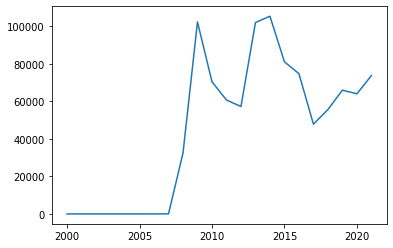

In [14]:
# 1
_ = pd.to_datetime(new_df.INSPECTION_DATE).dt.year.value_counts().sort_index().plot.line()

In [15]:
new_df.groupby("CITY")[TARGET].value_counts(normalize=True).rename("freq").reset_index()

,CITY,CURRENT_ENERGY_RATING,freq
0,Birmingham,D,0.412213
1,Birmingham,C,0.238488
2,Birmingham,E,0.217707
3,Birmingham,B,0.072741
4,Birmingham,F,0.044451
5,Birmingham,G,0.013563
6,Birmingham,A,0.000837
7,Leeds,D,0.405677
8,Leeds,C,0.278914
9,Leeds,E,0.177825


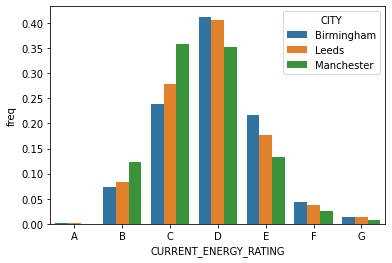

In [16]:
# 2

import seaborn as sns

_ = sns.barplot(
    data=new_df.groupby("CITY")[TARGET].value_counts(normalize=True).rename("freq").reset_index().sort_values(["CITY", TARGET]),
    x=TARGET,
    hue="CITY",
    y="freq")

In [17]:
# 2

new_df.loc[new_df[TARGET].isin(["F", "G"]), "CITY"].value_counts()

Birmingham    23649
Leeds         17100
Manchester     8601
Name: CITY, dtype: int64

In [19]:
# 3

from impactdeal.cleaning import clean_age_band

new_df = clean_age_band(new_df)
new_df["CONSTRUCTION_AGE_BAND"].value_counts().sort_index()

1900-1929       195511
1930-1949       166825
1950-1966       147326
1967-1975        92628
1976-1982        42580
1983-1990        37914
1991-1995        27333
1996-2002        43234
2003-2006        50972
2007 onwards     36382
before 1900      62986
Name: CONSTRUCTION_AGE_BAND, dtype: int64

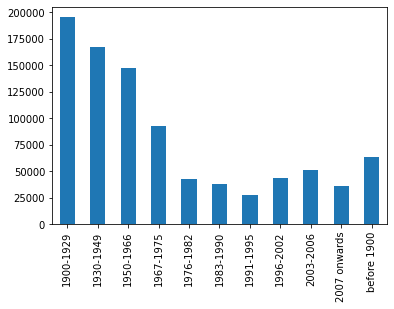

In [20]:
# 3

_ = new_df["CONSTRUCTION_AGE_BAND"].value_counts().sort_index().plot.bar()

In [21]:
# 4
new_df["LOW_ENERGY_LIGHTING"].describe()

count    964915.000000
mean         52.704693
std          36.326494
min           0.000000
25%          20.000000
50%          50.000000
75%          89.000000
max         100.000000
Name: LOW_ENERGY_LIGHTING, dtype: float64

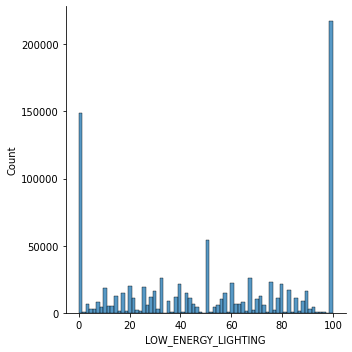

In [22]:
# 4
_ = sns.displot(data=new_df["LOW_ENERGY_LIGHTING"], kind="hist")

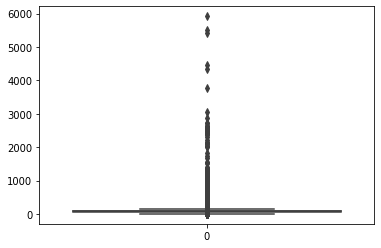

In [23]:
# 5
_ = sns.boxplot(data=new_df.loc[:, "TOTAL_FLOOR_AREA"])

In [24]:
df["FLAT_STOREY_COUNT"].isnull().mean()

0.9096866733953419

In [25]:
new_df[NUMERICAL].corr()

,TOTAL_FLOOR_AREA,FLAT_STOREY_COUNT,MULTI_GLAZE_PROPORTION,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,WIND_TURBINE_COUNT,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT
TOTAL_FLOOR_AREA,1.000000,0.091251,-0.036779,0.354006,0.713037,0.696131,-0.041026,0.164185,0.006453,0.041661,0.053189,0.488059,0.275123
FLAT_STOREY_COUNT,0.091251,1.000000,0.079620,-0.082358,0.002373,0.002868,-0.085291,-0.031092,0.003553,0.026212,-0.053037,NaN,NaN
MULTI_GLAZE_PROPORTION,-0.036779,0.079620,1.000000,0.013838,-0.009896,0.018422,0.064049,-0.095009,-0.001130,0.000510,-0.057240,0.002638,0.024423
EXTENSION_COUNT,0.354006,-0.082358,0.013838,1.000000,0.402299,0.398044,0.011854,0.092294,-0.004872,-0.014768,0.071492,0.318705,0.180175
NUMBER_HABITABLE_ROOMS,0.713037,0.002373,-0.009896,0.402299,1.000000,0.928330,-0.031837,0.162992,-0.003270,0.028354,0.056021,0.574807,0.311365
NUMBER_HEATED_ROOMS,0.696131,0.002868,0.018422,0.398044,0.928330,1.000000,-0.011690,0.148911,-0.002766,0.029246,0.052099,0.560692,0.314506
LOW_ENERGY_LIGHTING,-0.041026,-0.085291,0.064049,0.011854,-0.031837,-0.011690,1.000000,-0.055180,0.013677,-0.003367,0.003096,-0.055415,0.603559
NUMBER_OPEN_FIREPLACES,0.164185,-0.031092,-0.095009,0.092294,0.162992,0.148911,-0.055180,1.000000,-0.000771,0.000296,0.045550,0.107067,0.010323
WIND_TURBINE_COUNT,0.006453,0.003553,-0.001130,-0.004872,-0.003270,-0.002766,0.013677,-0.000771,1.000000,-0.000971,-0.000716,-0.002042,-0.005417
UNHEATED_CORRIDOR_LENGTH,0.041661,0.026212,0.000510,-0.014768,0.028354,0.029246,-0.003367,0.000296,-0.000971,1.000000,0.002734,0.045717,-0.000951


In [26]:
df[["LOW_ENERGY_LIGHTING", "FIXED_LIGHTING_OUTLETS_COUNT", "LOW_ENERGY_FIXED_LIGHT_COUNT"]].isnull().mean()

LOW_ENERGY_LIGHTING             0.028054
FIXED_LIGHTING_OUTLETS_COUNT    0.540350
LOW_ENERGY_FIXED_LIGHT_COUNT    0.604011
dtype: float64

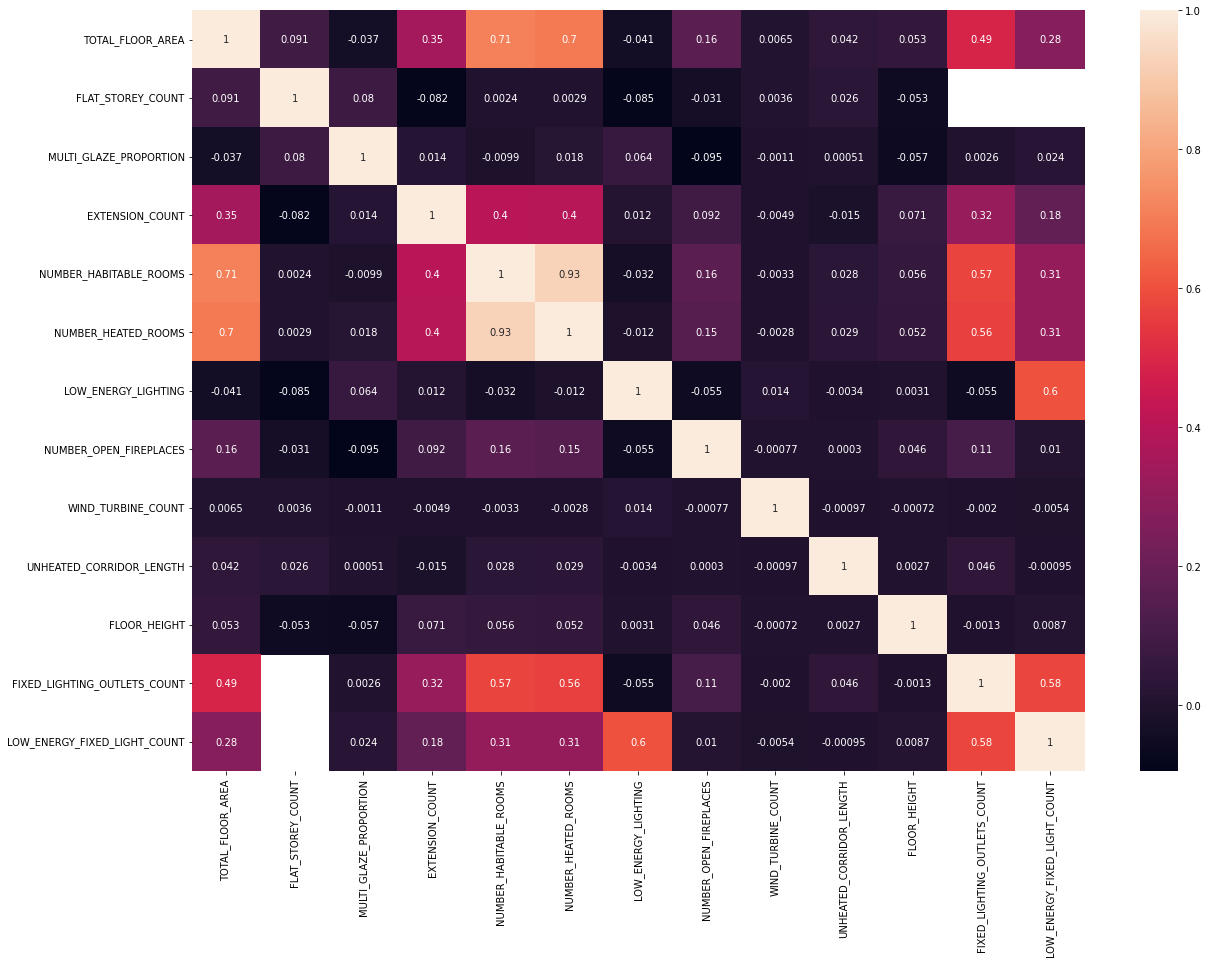

In [27]:
# 6

import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

sns.heatmap(new_df[NUMERICAL].corr(), annot=True)